In [26]:
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import time
import copy
import os

from torchvision import models
from torchvision.models.vgg import VGG
from torch.utils.data import DataLoader
from torchvision import transforms, utils
import torch.nn.functional as F
from torch.optim import lr_scheduler
from torch.autograd import Variable

In [29]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

In [30]:
input_image = plt.imread('data/2007_003431.jpg')
image = np.transpose(input_image,(2,0,1))
print('input_image shape is: {}'.format(image.shape))

input_image shape is: (3, 500, 375)


In [23]:
image = torch.tensor(image).float()
image = image/255.
image = [image]

In [25]:
model.eval()
output =model(image)
output

[{'boxes': tensor([[348.3026, 280.2780, 375.0000, 364.9830],
          [ 57.0164, 232.5012, 127.0275, 467.6289],
          [ 20.0370,  15.9420, 360.4182, 496.2699],
          [  2.0250, 264.2859,  25.0365, 330.7031],
          [  6.7718, 256.5020,  24.3631, 280.5589],
          [  0.0000, 349.9092, 166.2967, 496.9886],
          [  0.9174, 257.8541,  27.4660, 329.7732],
          [  0.0000, 324.9531, 279.6140, 500.0000],
          [  4.2829, 249.4364,  16.6743, 266.8985],
          [349.0007, 281.2812, 374.9428, 323.9969],
          [189.9460, 442.1552, 214.7375, 486.2267],
          [ 29.2476, 236.9598, 110.6445, 415.6333],
          [ 12.8234, 258.0341,  25.2983, 276.3853],
          [  7.3843, 421.2614, 232.3329, 499.4100],
          [  3.7222, 250.0241,  23.9884, 274.5879],
          [  0.0000, 310.9161,  69.2390, 490.8713],
          [  9.3229, 255.3724,  22.7821, 271.9862],
          [199.4308, 459.1360, 213.6224, 480.1771],
          [  2.9674, 259.1346,  30.9271, 285.4851],
   

In [41]:
bbox = output[0]['boxes'].data.numpy()

In [42]:
bbox.dtype

dtype('float32')

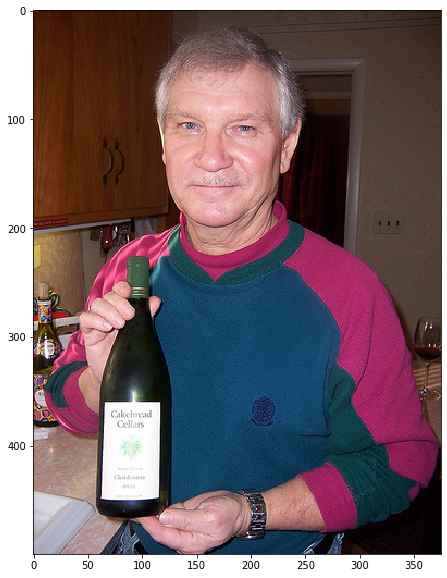

In [43]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
for i in range(len(bbox)):
    rect = plt.Rectangle((bbox[i][2],bbox[i][1]), bbox[i][2]-bbox[i][0], bbox[i][3]-bbox[i][1], fill=False, edgecolor = 'red',linewidth=1)
    rect = plt.Rectangle((0,317), 1,1, fill=False, edgecolor = 'red',linewidth=1)
    ax.add_patch(rect)
plt.imshow(input_image)
plt.show()

In [2]:
import cv2

In [14]:
src_img = cv2.imread('data/2007_003431.jpg')
img = cv2.cvtColor(src_img, cv2.COLOR_BGR2RGB)
img_tensor = torch.from_numpy(img/255.).permute(2,0,1).float()

In [15]:
img_tensor= [img_tensor]

In [16]:
output2 =model(img_tensor)
output2

[{'boxes': tensor([[ 20.2289,  18.4817, 360.7409, 495.5522],
          [348.2946, 282.8087, 374.8243, 360.2990],
          [ 58.4457, 237.4332, 126.6662, 475.2049],
          [  2.1914, 265.1291,  24.5062, 329.9907],
          [  0.0000, 349.0412, 167.5489, 497.1016],
          [  7.5515, 257.7133,  25.2137, 280.7075],
          [  1.0332, 257.9163,  27.2176, 329.1154],
          [  3.1855, 252.1398,  24.9516, 285.3022],
          [190.9780, 444.7575, 215.3012, 486.7680],
          [ 23.3148, 231.4957, 107.1247, 402.7169],
          [  0.0000, 283.3060, 294.4338, 497.3107],
          [  4.2845, 249.4721,  17.1410, 266.9756],
          [  7.5778, 291.6125,  19.8411, 324.8029],
          [  7.3209, 421.6077, 233.0069, 499.2836],
          [ 11.6901, 256.7886,  24.0915, 273.2751],
          [  0.0000, 309.7909,  69.4065, 490.2769],
          [ 10.5306, 379.4423, 347.3806, 496.4600],
          [349.5766, 281.6848, 374.6134, 322.4396],
          [  0.0000, 271.4800,  23.8889, 389.0619],
   